# Carga de librerías y definición de variables de ambiente

In [1]:
#import rho_data_eng as eng
import pandas as pd
import numpy as np
import os


pd.set_option('display.max_columns', 500)

ds_path = os.getcwd()[:-len('notebooks')] + 'Data/Data Science/'
cars_path = os.getcwd()[:-len('notebooks')] + 'Data/Used Cars/'


ds_files = [x for x in os.listdir(ds_path) if 'train' in x]
cars_files = [x for x in os.listdir(cars_path) if 'unclean' in x]

print(ds_files)
print(cars_files)

['aug_train.csv']
['unclean cclass.csv', 'unclean focus.csv']


In [ ]:
def missing_zero_values_table(df):

        zero_val = (df == 0.00).astype(int).sum(axis=0)

        mis_val = df.isnull().sum()

        mis_val_percent = 100 * df.isnull().sum() / len(df)

        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)

        mz_table = mz_table.rename(

        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})

        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']

        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)

        mz_table['Data Type'] = df.dtypes

        mz_table = mz_table[

            mz_table.iloc[:,1] != 0].sort_values(

        '% of Total Values', ascending=False).round(1)

        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      

            "There are " + str(mz_table.shape[0]) +

              " columns that have missing values.")

        return mz_table

# Carga de Datos

Cargaremos los de CClass y Ciencia de Datos, y realizaremos el procesamiento para algunas variables.

In [2]:
cclass = pd.read_csv(cars_path + cars_files[0])
ds = pd.read_csv(ds_path + ds_files[0])

## Revisión de Missings:

In [3]:
eng.missing_zero_values_table(cclass)
"""Vemos que la columna fuel type no es representativa, igual la fecha 
esta en float lo que habla de un cambio en variables que se
tendrá que hacer""""""

Your selected dataframe has 11 columns and 4006 Rows.
There are 11 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
fuel type,0,2677,66.8,2677,66.8,object
mileage,0,198,4.9,198,4.9,object
fuel type2,0,198,4.9,198,4.9,object
engine size2,0,198,4.9,198,4.9,object
engine size,0,164,4.1,164,4.1,object
mileage2,0,116,2.9,116,2.9,object
year,0,102,2.5,102,2.5,float64
model,0,99,2.5,99,2.5,object
price,0,99,2.5,99,2.5,object
transmission,0,99,2.5,99,2.5,object


In [4]:
eng.missing_zero_values_table(ds)

Your selected dataframe has 14 columns and 19158 Rows.
There are 8 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
company_type,0,6140,32.0,6140,32.0,object
company_size,0,5938,31.0,5938,31.0,object
gender,0,4508,23.5,4508,23.5,object
major_discipline,0,2813,14.7,2813,14.7,object
education_level,0,460,2.4,460,2.4,object
last_new_job,0,423,2.2,423,2.2,object
enrolled_university,0,386,2.0,386,2.0,object
experience,0,65,0.3,65,0.3,object


## Tratamiento de valores ausentes:

* 1. Omisión
* 2. Imputación
    * Utilizando Media/Mediana
    * Utilizando Moda/Valor constante
    * KNN
    * Regresión Estocástica
* 3. KS y Chi-square

## 1. Omisión

La Omisión la realizaremos para aquellas columnas que tengan únicamente un porcentaje menor al 5% de datos reportados como ausentes. 

* Por ejemplo: 
    * Data Science education_level
    * enrolled_university
    * experience

In [5]:
# Omisión

"""Definimos primero nuestras variables, despues filtramos en ds
de las variables agarramos los que no sean nulos. Se usa un & dado que
buscamos los dos que no sean nulos.
Con lost_info vamos a calcular el porcentaje de informacion perdida 
resultante de la reduccion
Para ver los renglones perdidos es con len(ds)-len(oms)"""

vars_ = ['education_level', 'enrolled_university', 'experience']


omds = ds.loc[(ds[vars_[0]].isna() == False) 
              & (ds[vars_[1]].isna() == False) 
              & (ds[vars_[2]].isna() == False)].copy()
lost_info = 100*(1 - len(omds)/len(ds))

print(f'Información perdida = {lost_info}')

Información perdida = 0.010439503079651136


In [6]:
# Omisión

vars_ = ['education_level', 'enrolled_university', 'experience']


omds = ds.loc[(ds[vars_[0]].isnull() == False) | (ds[vars_[1]].isnull() == False) | (ds[vars_[2]].isnull() == False)].copy()
lost_info = 100*(1 - len(omds)/len(ds))

print(f'Información perdida = {lost_info}')

Información perdida = 0.010439503079651136


In [7]:
# Omisión

vars_ = ['education_level', 'enrolled_university', 'experience']


omds = ds.loc[(ds[vars_[0]].astype(str) != 'nan') 
              & (ds[vars_[1]].astype(str) != 'nan') 
              & (ds[vars_[2]].astype(str) != 'nan')].copy()
lost_info = 100*(1 - len(omds)/len(ds))

print(f'Información perdida = {lost_info}')

Información perdida = 0.010439503079651136


Realmente podemos apreciar que en efecto, no perdimos gran cantidad de información. 

## 2. Imputación

### Utilizando Media/Mediana

La imputación a través de la media/mediana, la haremos para valores continuos, en este caso, utilizaremos scikit-learn, y las variables serán las siguientes:

* mileage
* engine size2

Del dataset de cclass

In [8]:
# Librerías
"""Imopramos el simple imputer"""
from sklearn.impute import SimpleImputer

In [9]:
cclass

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,C Class,2020.0,"£30,495",Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,"£29,989",Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,"£37,899",Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,"£30,399",Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,"£29,899",Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660
...,...,...,...,...,...,...,...,...,...,...,...
4001,C Class,2017.0,"£14,700",Manual,"31,357",25,£150,70.6,Diesel,1.598,/ad/25451436
4002,C Class,2018.0,"£18,500",Automatic,"28,248",31,£150,64.2,Diesel,2.143,/ad/25451481
4003,C Class,2014.0,"£11,900",Manual,"48,055",31,£20,65.7,Diesel,2.143,/ad/25057204
4004,C Class,2014.0,"£11,300",Automatic,"49,865",46,£145,56.5,Diesel,2.143,/ad/25144481


In [10]:
"""SimpleImputer pide el tipo de nulos 
La funcion clean funciona para transporfmar los datos,
reshape sirve para cambiar la forma de la lista de valores"""

#Columns
cols = ['mileage', 'engine size2']

# Instanciamos la clase:
impmean = SimpleImputer(missing_values=np.nan, strategy='mean')
impmedian = SimpleImputer(missing_values=np.nan, strategy='median')

def clean(x):
    
    if type(x) == str:
        if x =='Unknown': x = np.nan
        else: x = float(x.replace(',', '').replace(' ', ''))
    else: x = float(x)
    
    return(x)

aux = cclass[cols].copy()
aux[cols[0] + '_imp_mean'] = impmean.fit_transform(np.array(aux[cols[0]].map(lambda x:clean(x))).reshape(-1,1))
aux[cols[1] + '_imp_median'] = impmedian.fit_transform(np.array(aux[cols[1]].map(lambda x:clean(x))).reshape(-1,1))
aux

,mileage,engine size2,mileage_imp_mean,engine size2_imp_median
0,NaN,NaN,22126.070434,2.000
1,NaN,NaN,22126.070434,2.000
2,NaN,NaN,22126.070434,2.000
3,NaN,NaN,22126.070434,2.000
4,NaN,NaN,22126.070434,2.000
...,...,...,...,...
4001,"31,357",1.598,31357.000000,1.598
4002,"28,248",2.143,28248.000000,2.143
4003,"48,055",2.143,48055.000000,2.143
4004,"49,865",2.143,49865.000000,2.143


### Utilizando Moda/Valor fijo

La imputación a través de la Moda/Valor Fijo, la haremos para valores discretos, en este caso, utilizaremos scikit-learn, y las variables serán las siguientes:

* gender
* major_discipline

Del dataset de ds

In [11]:
# Columnas
"""astype es mas rapido que map
re shape sirve que un arreglo numpy que es un vector, lo transforma
en una matriz, es util para sscikitlearn"""
cols = ['gender', 'major_discipline']

modeimputer = SimpleImputer(missing_values='nan', strategy='most_frequent')
fxvalimputer = SimpleImputer(missing_values='nan', strategy='constant', fill_value = 'Other')

aux1 = ds[cols].copy()
aux1[cols[0] + '_imp_mode'] = fxvalimputer.fit_transform(np.array(aux1[cols[0]].map(lambda x:str(x))).reshape(-1,1))
aux1[cols[1] + '_imp_fixed_value'] = modeimputer.fit_transform(np.array(aux1[cols[1]].map(lambda x:str(x))).reshape(-1,1))
aux1

,gender,major_discipline,gender_imp_mode,major_discipline_imp_fixed_value
0,Male,STEM,Male,STEM
1,Male,STEM,Male,STEM
2,NaN,STEM,Other,STEM
3,NaN,Business Degree,Other,Business Degree
4,Male,STEM,Male,STEM
...,...,...,...,...
19153,Male,Humanities,Male,Humanities
19154,Male,STEM,Male,STEM
19155,Male,STEM,Male,STEM
19156,Male,NaN,Male,STEM


In [12]:
aux1.loc[aux1['major_discipline'].isna() == True]

,gender,major_discipline,gender_imp_mode,major_discipline_imp_fixed_value
6,Male,NaN,Male,STEM
10,NaN,NaN,Other,STEM
13,Male,NaN,Male,STEM
14,NaN,NaN,Other,STEM
25,NaN,NaN,Other,STEM
...,...,...,...,...
19140,NaN,NaN,Other,STEM
19142,Male,NaN,Male,STEM
19151,Male,NaN,Male,STEM
19156,Male,NaN,Male,STEM


In [13]:
aux1.loc[aux1['major_discipline'].astype(str) == 'nan']

,gender,major_discipline,gender_imp_mode,major_discipline_imp_fixed_value
6,Male,NaN,Male,STEM
10,NaN,NaN,Other,STEM
13,Male,NaN,Male,STEM
14,NaN,NaN,Other,STEM
25,NaN,NaN,Other,STEM
...,...,...,...,...
19140,NaN,NaN,Other,STEM
19142,Male,NaN,Male,STEM
19151,Male,NaN,Male,STEM
19156,Male,NaN,Male,STEM


In [14]:
aux1['gender_imp_mode'].value_counts()

Male      13221
Other      4699
Female     1238
Name: gender_imp_mode, dtype: int64

In [15]:
aux1['gender'].value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

### KNN

Imputaremos valores continuos, volveremos a utilizar las siguiente variable:

* year

Del dataset de cclass

In [16]:
"""Son valores continuas, por eso usamos año"""
from sklearn.impute import KNNImputer

In [17]:
KNNImputer?

In [18]:
cclass.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuel type',
       'engine size', 'mileage2', 'fuel type2', 'engine size2', 'reference'],
      dtype='object')

In [19]:
# Columnas
"""Agarramos las variables continuas, clean mapea bien los numeros"""
cols = ['mileage', 'engine size2', 'year']
aux2 = cclass[cols].copy()
aux2['mileage'] = aux2['mileage'].apply(lambda x:clean(x))
aux2['engine size2'] = aux2['engine size2'].apply(lambda x:clean(x))
aux2

,mileage,engine size2,year
0,NaN,NaN,2020.0
1,NaN,NaN,2020.0
2,NaN,NaN,2020.0
3,NaN,NaN,2019.0
4,NaN,NaN,2019.0
...,...,...,...
4001,31357.0,1.598,2017.0
4002,28248.0,2.143,2018.0
4003,48055.0,2.143,2014.0
4004,49865.0,2.143,2014.0


In [20]:
"""Creamos una lista de columnas, ind es indicador.
El arreglo se convierte en df para mejor entendimiento,
el numero de vecinos dependeeá por lo cual no es tan usado"""
kimp = KNNImputer(add_indicator=True)
columns = [c +'_imp' for c in aux2.columns] + [c +'_ind' for c in aux2.columns]
pd.DataFrame(kimp.fit_transform(np.array(aux2)), columns = columns)

,mileage_imp,engine size2_imp,year_imp,mileage_ind,engine size2_ind,year_ind
0,1245.2,2.100,2020.0,1.0,1.0,0.0
1,1245.2,2.100,2020.0,1.0,1.0,0.0
2,1245.2,2.100,2020.0,1.0,1.0,0.0
3,6513.8,1.700,2019.0,1.0,1.0,0.0
4,6513.8,1.700,2019.0,1.0,1.0,0.0
...,...,...,...,...,...,...
4001,31357.0,1.598,2017.0,0.0,0.0,0.0
4002,28248.0,2.143,2018.0,0.0,0.0,0.0
4003,48055.0,2.143,2014.0,0.0,0.0,0.0
4004,49865.0,2.143,2014.0,0.0,0.0,0.0


### Regresión estocástica

Imputaremos valores continuos, volveremos a utilizar las siguiente variable:

* mileage

Del dataset de cclass

In [21]:
cclass.head(3)

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,C Class,2020.0,"£30,495",Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,"£29,989",Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,"£37,899",Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894


In [22]:
"""Subdataframa, definimos las variables predictoras y la objetivo"""
aux3 = cclass[['year', 'price', 'mileage']].copy()
pred = ['year', 'price']
tar = 'mileage'
aux3['mileage'] = aux3['mileage'].map(lambda x:clean(x))
aux3

,year,price,mileage
0,2020.0,"£30,495",NaN
1,2020.0,"£29,989",NaN
2,2020.0,"£37,899",NaN
3,2019.0,"£30,399",NaN
4,2019.0,"£29,899",NaN
...,...,...,...
4001,2017.0,"£14,700",31357.0
4002,2018.0,"£18,500",28248.0
4003,2014.0,"£11,900",48055.0
4004,2014.0,"£11,300",49865.0


In [23]:
# Revisión de Missings en las variables predictoras 

#para fines de esta situación omitiremos esos missings.

eng.missing_zero_values_table(aux3.sort_values(by = 'year'))

Your selected dataframe has 3 columns and 4006 Rows.
There are 3 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
mileage,0,201,5.0,201,5.0,float64
year,0,102,2.5,102,2.5,float64
price,0,99,2.5,99,2.5,object


In [24]:
"""Importmaos regular expresions, con el importamos solo los numeros.
Cuando son varios casos se usa, si no con replace o strip"""
import re
re.sub("[^0-9]", "", '£11,300')

'11300'

In [25]:
"""Se llega a lo mismo pero en mas pasos, con el filtro ve que sean
digitos y los separa en listas, ya depues se pegan con un join"""
numeric_filter = filter(str.isdigit, '£11,300')
numeric_string = "".join(numeric_filter)
numeric_string

'11300'

In [26]:
def clean(x):
    
    if type(x) == str:
        if x =='Unknown': x = np.nan
        else: x = float(x.replace(',', '').replace(' ', ''))
    else: x = float(x)
    
    return(x)

def clean2(x):
    import re
    
    
    if type(x) == str:
        x = re.sub("[^0-9]", "", x)
        return(x)
    else:
        return(x)

In [27]:
aux3['price'] = aux3['price'].apply(lambda x:clean2(x))
aux3['mileage'] = aux3['mileage'].apply(lambda x:clean(x))

In [28]:
aux3.reset_index(drop = True, inplace = True)

In [29]:
# Vamos a utilizar KNN para imputar los valores de las variables predictoras.

ki = KNNImputer(add_indicator=True)
columns = [c +'_imp' for c in aux3.columns] + [c +'_ind' for c in aux3.columns]
aux3_imp = pd.DataFrame(ki.fit_transform(np.array(aux3)), columns = columns)
aux3 = aux3.merge(aux3_imp, how = 'inner', left_index = True, right_index = True)

In [30]:
aux3

,year,price,mileage,year_imp,price_imp,mileage_imp,year_ind,price_ind,mileage_ind
0,2020.0,30495,NaN,2020.0,30495.0,7585.0,0.0,0.0,1.0
1,2020.0,29989,NaN,2020.0,29989.0,5970.6,0.0,0.0,1.0
2,2020.0,37899,NaN,2020.0,37899.0,8219.2,0.0,0.0,1.0
3,2019.0,30399,NaN,2019.0,30399.0,6758.2,0.0,0.0,1.0
4,2019.0,29899,NaN,2019.0,29899.0,7028.6,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
4001,2017.0,14700,31357.0,2017.0,14700.0,31357.0,0.0,0.0,0.0
4002,2018.0,18500,28248.0,2018.0,18500.0,28248.0,0.0,0.0,0.0
4003,2014.0,11900,48055.0,2014.0,11900.0,48055.0,0.0,0.0,0.0
4004,2014.0,11300,49865.0,2014.0,11300.0,49865.0,0.0,0.0,0.0


In [31]:
train = aux3[['year_imp', 'price_imp', 'year_ind', 'price_ind', 'mileage']].loc[aux3['mileage'].isna() == False].copy()
val = aux3[['year_imp', 'price_imp', 'year_ind', 'price_ind', 'mileage']].loc[aux3['mileage'].isna() == True].copy()

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
train.reset_index(drop = True, inplace = True)

In [34]:
val.reset_index(drop = True, inplace = True)

In [35]:
# Regresión Lineal
pred = ['year_imp', 'price_imp', 'year_ind', 'price_ind'] #Variables explicativas
X = train[pred]
y = train[tar]
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [36]:
lr.predict(val[pred]) #Las millas no son negativas

array([  1304.84424719,   1665.21252852,  -3968.21258082,   7466.34313789,
         7822.43827755,    945.90034642,  -2615.05105013,   2060.10672765,
         8469.81924144,   8469.81924144,  21264.42797906,  21264.42797906,
        21264.42797906,  21264.42797906,  21264.42797906,  21264.42797906,
        21264.42797906,  21264.42797906,  21264.42797906,  21264.42797906,
        21264.42797906,  21264.42797906,  21264.42797906,  21264.42797906,
        21264.42797906,  21264.42797906,  21264.42797906,  21264.42797906,
        21264.42797906,  21264.42797906,  21264.42797906,  21264.42797906,
        21264.42797906,  21264.42797906,  21264.42797906,  21264.42797906,
        21264.42797906,  21264.42797906,  21264.42797906,  21264.42797906,
        21264.42797906,  37424.93739996,  32439.6054448 ,  44230.25630317,
        25349.41042987,  25088.03659737,  44942.44658247,  37424.93739996,
        44942.44658247,  21264.42797906,  21264.42797906,  21264.42797906,
        21264.42797906,  

In [37]:
val['linear regression'] = lr.predict(val[pred])

In [38]:
"""Se le va a ajustar una normal"""
val['linear regression'].describe(percentiles = [i/10 for i in range(10)])

count       201.000000
mean      26193.924292
std       18575.979258
min      -11859.993066
0%       -11859.993066
10%        7822.438278
20%       21264.427979
30%       21264.427979
40%       21264.427979
50%       21264.427979
60%       21264.427979
70%       25088.036597
80%       37424.937400
90%       44942.446582
max      125327.891870
Name: linear regression, dtype: float64

In [39]:
def isnegative(x, val):
    if x < 0:
        return(val)
    else:
        return(x)

In [40]:
#Encontramos el valor minimo por el cual vamos a remplazar, esto se hace dado que no
#tiene sentido un km negativo o en cero porque es improbable.
"""Igual es posible aproximar con KNN y luego omitir esos registros"""
min_m = val['linear regression'].loc[val['linear regression'] >= 0].min()

In [41]:
val['linear regression abs'] = val['linear regression'].map(lambda x:abs(x))
val['linear regression min'] = val['linear regression'].map(lambda x:isnegative(x,min_m))
val

,year_imp,price_imp,year_ind,price_ind,mileage,linear regression,linear regression abs,linear regression min
0,2020.0,30495.0,0.0,0.0,NaN,1304.844247,1304.844247,1304.844247
1,2020.0,29989.0,0.0,0.0,NaN,1665.212529,1665.212529,1665.212529
2,2020.0,37899.0,0.0,0.0,NaN,-3968.212581,3968.212581,247.241682
3,2019.0,30399.0,0.0,0.0,NaN,7466.343138,7466.343138,7466.343138
4,2019.0,29899.0,0.0,0.0,NaN,7822.438278,7822.438278,7822.438278
...,...,...,...,...,...,...,...,...
196,2020.0,34480.0,0.0,0.0,NaN,-1533.234016,1533.234016,247.241682
197,2016.0,14000.0,0.0,0.0,NaN,37424.937400,37424.937400,37424.937400
198,2015.0,12000.0,0.0,0.0,NaN,44942.446582,44942.446582,44942.446582
199,2017.0,22767.0,0.0,0.0,NaN,25088.036597,25088.036597,25088.036597


### Regresión estocástica

Para esto debemos calcular la varianza, entonces utilizaremos la predicción sobre el conjunto de entrenamiento y con base a eso, generaremos la distribución normal de los errores. 

In [42]:
y.values - lr.predict(X)  #Vemos el historial

array([-13656.64534027,  21413.65519791,  48569.75033756, ...,
        -3051.7942343 ,  -1669.10840188,   6403.5575757 ])

In [43]:
import matplotlib.pyplot as plt

In [44]:
np.histogram(y.values - lr.predict(X))

(array([   2,    1,    0,   21,  782, 2632,  288,   55,   16,    8]),
 array([-117834.6775772 ,  -95781.04702212,  -73727.41646705,
         -51673.78591197,  -29620.15535689,   -7566.52480182,
          14487.10575326,   36540.73630834,   58594.36686341,
          80647.99741849,  102701.62797357]))

(array([3.000e+00, 2.100e+01, 3.414e+03, 3.430e+02, 2.400e+01]),
 array([-117834.6775772 ,  -73727.41646705,  -29620.15535689,
          14487.10575326,   58594.36686341,  102701.62797357]),
 <BarContainer object of 5 artists>)

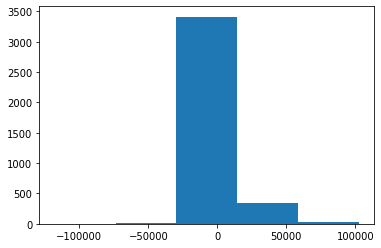

In [45]:
plt.hist(y.values - lr.predict(X), bins = 5)

In [46]:
"""Usamos la desv estandar en lugar de la varianza porque
la varianza los errores grandes los eleva mucho y los da en otras unidades.
ppor lo que la desv estandar hace que se regrese a la escala anterior"""


# Cálculo de los residuales
residuals = y.values - lr.predict(X)

# Cálculo de la varianza
variance = residuals.var()

# Generamos los errores #Se dearrolla con la media de los residuales, o 
#si es cercano a 0 ponemos cero
rnoise = np.random.normal(0, np.sqrt(variance), len(val))

# Regresión estocástica, ruido provoca valores negativos, por lo que
#se repite el proceso anterior
val['Stochastic regression'] = val['linear regression'] + rnoise

m = train['mileage'].mean()

In [47]:
def no_neg(x, m):
    
    if x<0:
        return(m)
    else:
        return(x)

In [48]:
val.sort_values(by = 'price_imp')

,year_imp,price_imp,year_ind,price_ind,mileage,linear regression,linear regression abs,linear regression min,Stochastic regression
168,2003.0,1795.0,0.0,0.0,NaN,125327.891870,125327.891870,125327.891870,123315.281495
167,2005.0,2495.0,0.0,0.0,NaN,112643.101426,112643.101426,112643.101426,99614.147235
142,2010.0,6994.0,0.0,0.0,NaN,78973.314240,78973.314240,78973.314240,74363.574641
164,2011.0,8490.0,0.0,0.0,NaN,71814.748958,71814.748958,71814.748958,76517.287042
136,2013.0,8980.0,0.0,0.0,NaN,59279.518474,59279.518474,59279.518474,23157.226274
...,...,...,...,...,...,...,...,...,...
121,2016.0,40995.0,0.0,0.0,NaN,18199.360810,18199.360810,18199.360810,25132.116678
188,2020.0,42890.0,0.0,0.0,NaN,-7522.754265,7522.754265,247.241682,-28320.242140
156,2017.0,46950.0,0.0,0.0,NaN,7865.139073,7865.139073,7865.139073,6715.802077
158,2020.0,48980.0,0.0,0.0,NaN,-11859.993066,11859.993066,247.241682,-25726.238763


In [49]:
import plotly.graph_objects as go

val = val.sort_values(by = 'price_imp')

random_x = val['price_imp']
#random_y0 = val['mileage']
random_y1 = val['linear regression']
random_y2 = val['Stochastic regression']

# Creamos los trazos
fig = go.Figure()
fig.add_trace(go.Scatter(x=random_x, y=random_y1,
                    mode='markers',
                    name='Linear'))
fig.add_trace(go.Scatter(x=random_x, y=random_y2,
                    mode='markers',
                    name='Stochastic'))

fig.show()

In [50]:
def plot(df, x, y_values, sample = False, sample_size = .8, tipo = 'lines'):
    
    import plotly.graph_objects as go

    if sample:
        df = df.sample(frac = sample_size)
        
    df = df.sort_values(by = x)
    
    vals = dict()
    random_x = df[x]
    
    

    # Creamos los trazos
    fig = go.Figure()
    
    
    for y in y_values:
        
        fig.add_trace(go.Scatter(x=random_x, y=df[y],
                            mode=tipo,
                            name=y))

    return(fig.show())

In [51]:
plot(val, 'price_imp', ['linear regression', 'Stochastic regression'], sample = True, sample_size = .2, tipo = 'markers')

In [52]:
plot(val, 'price_imp', ['linear regression', 'Stochastic regression'], sample = True, sample_size = .2)

## KS y Chi-square

In [53]:
from scipy.stats import ks_2samp, chisquare #Importamos KS y Chisquare

In [54]:
ks_2samp?

In [55]:
aux3 #Usamos el de KNN

,year,price,mileage,year_imp,price_imp,mileage_imp,year_ind,price_ind,mileage_ind
0,2020.0,30495,NaN,2020.0,30495.0,7585.0,0.0,0.0,1.0
1,2020.0,29989,NaN,2020.0,29989.0,5970.6,0.0,0.0,1.0
2,2020.0,37899,NaN,2020.0,37899.0,8219.2,0.0,0.0,1.0
3,2019.0,30399,NaN,2019.0,30399.0,6758.2,0.0,0.0,1.0
4,2019.0,29899,NaN,2019.0,29899.0,7028.6,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
4001,2017.0,14700,31357.0,2017.0,14700.0,31357.0,0.0,0.0,0.0
4002,2018.0,18500,28248.0,2018.0,18500.0,28248.0,0.0,0.0,0.0
4003,2014.0,11900,48055.0,2014.0,11900.0,48055.0,0.0,0.0,0.0
4004,2014.0,11300,49865.0,2014.0,11300.0,49865.0,0.0,0.0,0.0


In [56]:
rsp1 = aux3['price_imp']
rsm1 = aux3['mileage_imp']
rsp2 = aux3['price_imp'].loc[aux3['price'].isna() == False]
rsm2 = aux3['mileage_imp'].loc[aux3['mileage'].isna() == False]

In [57]:
import random as rn
rn.randint(0,5)

0

In [58]:
ks_2samp([i for i in range(50)], [i+rn.randint(0,5) for i in range(-50, 0)]) # Distribuciones distintas

KstestResult(statistic=0.96, pvalue=9.812536491204155e-26)

In [59]:
ks_2samp([i for i in range(50)], [i for i in range(50)]) # Distribuciones iguales

KstestResult(statistic=0.0, pvalue=1.0)

In [60]:
# KS
ks_2samp(rsp1, rsp2)

KstestResult(statistic=0.013049085189722455, pvalue=0.882796852588368)

In [61]:
ks_2samp(rsm1, rsm2)

KstestResult(statistic=0.021390647274817078, pvalue=0.3273621400824941)

La prueba nos muestra el pvalue, si nosotros asginaramos un nivel de significancia $\alpha$ = .05, entonces requeriríamos que el pvalue fuese menor a ese .05. En este caso no se cumple, por lo que no podemos rechazar la hiótesis nula de que ambos provienen de una misma muestra aleatoria.

Por ende, dado que el pvalue nos reporta que no es menor que nuestro alpha, podemos no rechazar la hipótesis nula. 

In [62]:
# KS

ks_2samp(val['linear regression'], val['Stochastic regression'])

KstestResult(statistic=0.2736318407960199, pvalue=4.986174989865231e-07)

In [63]:
val.columns

Index(['year_imp', 'price_imp', 'year_ind', 'price_ind', 'mileage',
       'linear regression', 'linear regression abs', 'linear regression min',
       'Stochastic regression'],
      dtype='object')

In [64]:
ks_2samp(val['linear regression'], val['linear regression min'])

KstestResult(statistic=0.04477611940298507, pvalue=0.9881281871806125)

In [65]:
ks_2samp(val['linear regression'], val['linear regression abs'])

KstestResult(statistic=0.04477611940298507, pvalue=0.9881281871806125)

In [66]:
ks_2samp(val['linear regression min'], val['linear regression abs'])

KstestResult(statistic=0.04477611940298507, pvalue=0.9881281871806125)

# Chi

In [67]:
chisquare?

In [68]:
aux1

,gender,major_discipline,gender_imp_mode,major_discipline_imp_fixed_value
0,Male,STEM,Male,STEM
1,Male,STEM,Male,STEM
2,NaN,STEM,Other,STEM
3,NaN,Business Degree,Other,Business Degree
4,Male,STEM,Male,STEM
...,...,...,...,...
19153,Male,Humanities,Male,Humanities
19154,Male,STEM,Male,STEM
19155,Male,STEM,Male,STEM
19156,Male,NaN,Male,STEM


In [69]:
# Chi

chisquare(f_obs = aux1['gender_imp_mode'].value_counts(True).sort_index().values,
          f_exp = aux1['gender'].value_counts(True).sort_index().values)

Power_divergenceResult(statistic=4.191527958736933, pvalue=0.12297625643366397)

In [70]:
aux1['gender'].value_counts(1, dropna = False)

Male      0.690103
NaN       0.235306
Female    0.064621
Other     0.009970
Name: gender, dtype: float64

In [71]:
aux1['gender_imp_mode'].value_counts(1, dropna = False)

Male      0.690103
Other     0.245276
Female    0.064621
Name: gender_imp_mode, dtype: float64

La prueba nos muestra el pvalue, si nosotros asginaramos un nivel de significancia $\alpha$ = .05, entonces requeriríamos que el pvalue fuese menor a ese .05. En este caso no se cumple, por lo que no podemos rechazar la hiótesis nula de que ambos provienen de una misma muestra aleatoria.

In [72]:
aux4 = pd.DataFrame(aux1['gender_imp_mode'].value_counts(True))
aux4['prueba'] = [.05, .90, .05]
aux4

,gender_imp_mode,prueba
Male,0.690103,0.05
Other,0.245276,0.90
Female,0.064621,0.05


In [73]:
chisquare(f_obs = aux4['gender_imp_mode'].values,
          f_exp = aux4['prueba'].values) # Distribuciones distintas

Power_divergenceResult(statistic=8.675213809859189, pvalue=0.013067763214084926)